In [1]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

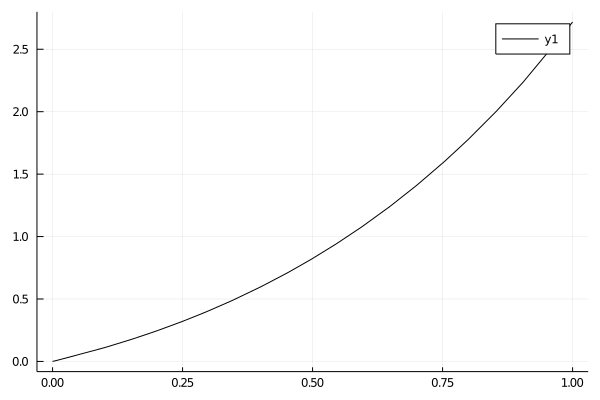

In [2]:
f(x) = exp(x) * x
plot(f, 0, 1, c=:black)

In [3]:
exp(1)

2.718281828459045

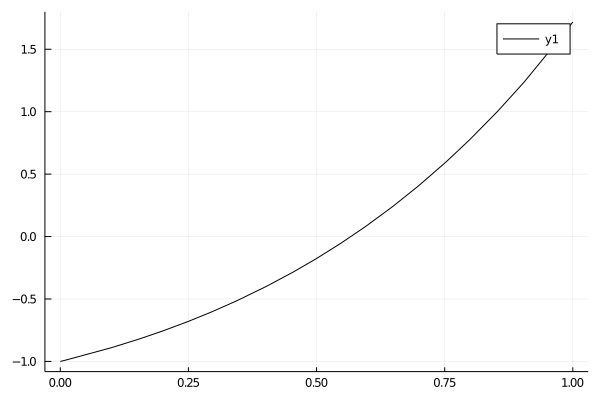

In [4]:
f(x) = exp(x) * x - 1
plot(f, 0, 1, c=:black)

No método da bisseção, buscamos encontrar o ponto onde o valor da função é zero. Para isso, podemos escolher dois pontos: um onde f(x) é negativo (podemos chamá-lo de x0) e outro onde ele é positivo (chamaremos de x1). Olhando o ponto médio "xm" desse intervalo inicial, verificamos se o valor de f(xm) é positivo ou negativo. Se for positivo, podemos olhar agora para o intervalo [x0, xm], verificando novamente o ponto médio. Caso seja negativo, escolhemos como novo intervalo [xm, x1], novamente escolhendo outro ponto médio. Fazendo isso repetidas vezes, teremos uma aproximação cada vez melhor para o zero da função, eventualmente chegando até ele.

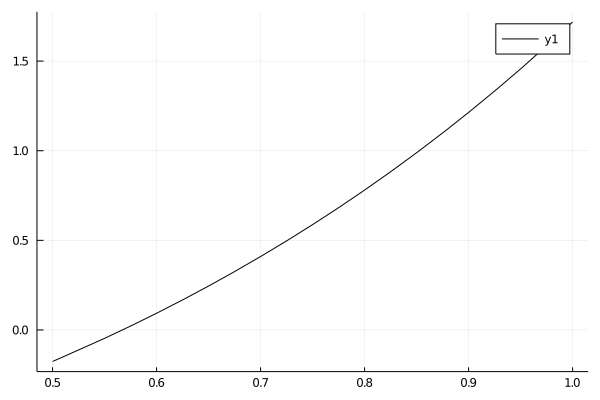

In [7]:
f(x) = exp(x) * x - 1
plot(f, 0.5, 1, c=:black)

### Teorema do Valor Intermediário

Se $f$ é contínua em $[a,b]$ e $f(a)$ e $f(b)$ tẽm sinais opostos, então $\exists c \in (a,b)$ tal que $f(c) = 0$.

### Método: 
1. Dado $[a,b]$ com $f(a) * f(b) < 0$
2. Escolho $c \in (a,b) \left( sendo \ c = \frac{a+b}{2} \ a \ bisseção \right)$
3. Se $f(c) = 0$, fim.
4. Senão, $f(a) * f(c) < 0$ ou $f(c) * f(c) < 0$, logo escolho o intervalo correspondente e repito.


*Obs: O produto $f(a) * f(b)$ só será negativo quando os sinais deles forem opostos.*

In [8]:
f(x) = x * exp(x) - 1
a, b = 0.0, 1.0

(0.0, 1.0)

In [44]:
x = (a + b) / 2
if f(a) * f(x) < 0
    b = x
else
    a = x
end
x, f(x)

(0.5671432904055109, -1.1807110844586077e-11)

### Critérios de parada

$|f(x_k)|$ pequeno

Usando um algoritmo num computador, temos um número finito de passos que podemos realizar na obtenção do valor da função. Portanto, nem sempre podemos obter o ponto onde ela é zero, como no caso em que ele só pode ser obtido quando a série se aproxima do infinito.

Assim, queremos que esse módulo se aproxime de zero. Temos então como critério de parada um valor que é tão pequeno quanto quisermos que ele seja, dependendo do erro que se pode cometer. 

$|f(x_k)| < \epsilon_A + \epsilon_R |f(x_0)|$

Sendo $\epsilon_A$ essa tolerância de erro que podemos cometer, o erro absoluto e $\epsilon_R$ o erro relativo.

#### Parada do método da Bisseçâo:

$|b_k-a_k| < \epsilon_A + \epsilon_R |b_0-a_0|$

#### Outros critérios de parada

##### A execução do algoritmo demorou demais, por conta de:

* valor de k muito grande.
* o número de avaliações ser muito grande.
* tempo muito grande.

##### Hipóteses falham

No caso da Bisseção, se $f(a)f(b) \ge 0$

---

### Erros absoluto e relativo

Sendo $x$ o valor exato e $\hat{x}$ nossa aproximação, podemos definir os erros como:

**Erro absoluto:** $|x-\hat{x}|$

**Erro relativo:** $\frac{|x - \hat{x}|}{|x|}$

In [47]:
"""
    (x, fx, exitflag) = bissecao(f, a, b)
"""
function bissecao(f, a, b;
                  atol = 1e-8, rtol = 1e-8,
                  max_tempo = 10.0, max_iter = 1000,
                  )
    # atol = erro absoluto tolerado
    # rtol = erro relativo tolerado
    fa = f(a)
    fb = f(b)
    ϵ = atol + rtol * max(abs(fa), abs(fb))
    ϵba = atol + rtol * abs(b - a)
    
    # antes de começar as iterações verificamos os pontos de entrada
    # caso já sejam bons o suficiente, eles são retornados
    if abs(fa) ≤ ϵ
        return a, fa, :sucesso
    elseif abs(fb) ≤ ϵ
        return b, fb, :sucesso
    elseif fa * fb ≥ 0
        return a, fa, :falha_sinais_opostos
    end
    
    # definimos o ponto médio inicial e o valor da função nesse ponto
    x = (a + b) / 2
    fx = f(x)
    
    # para acompanhar o número de iterações e tempo decorrido
    # não queremos que o algoritmo execute indefinidamente
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    # critérios de parada
    # caso o valor já esteja dentro do erro aceitável
    resolvido = (abs(fx) ≤ ϵ || abs(b - a) ≤ ϵba)
    
    # caso não seja possível encontrar o zero em um número finito de iterações e tempo
    cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    
    # enquanto não encontrarmos o zero da função ou
    # enquanto o algoritmo não tiver exaurido suas tentativas
    # fazemos a bisseção para tentar encontrar o zero
    while !(resolvido || cansado)
        # escolhemos o intervalo onde o zero se econtra
        # ou seja, aquele com pontos com sinais opostos
        if fa * fx < 0
            b = x
            fb = fx
        else
            a = x
            fa = fx
        end
        
        # definimos o novo ponto médio e o valor da função nesse ponto
        x = (a + b) / 2
        fx = f(x)
        
        # atualizamos as variáveis de controle de parada
        iter += 1
        Δt = time() - t0
        resolvido = (abs(fx) ≤ ϵ || abs(b - a) ≤ ϵba)
        cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    
    exitflag = :desconhecido
    if resolvido
        exitflag = :sucesso
    elseif cansado
        if iter ≥ max_iter
            exitflag = :max_iter
        else
            exitflag = :max_tempo
        end
    end
    
    return x, fx, exitflag
end

bissecao

In [48]:
f(x) = exp(x) * x - 1
a, b = 0.0, 1.0
bissecao(f, a, b)

(0.5671432912349701, 2.2801733834398874e-9, :sucesso)

In [49]:
f(x) = (exp(x) * x - 1) * 1e8
a, b = 0.0, 1.0
bissecao(f, a, b)

(0.5671432912349701, 0.22801733834398874, :sucesso)

Podemos usar o método da bisseção para encontrar o valor de $\sqrt{2}$ utilizando como função de entrada $f(x) = x^2 - 2$.

Isso porque encontrar o valor de $\sqrt{2}$ significa encontrar um valor de $x$ tal que $x^2 = 2$ , o que nos dá $x^2 - 2 = 0$. Agora o problema se torna o de encontrar o ponto onde a função $f(x) = x^2 - 2$ é igual a zero. Portanto, o método da bisseção pode ser utilizado.

In [50]:
f(x) = x^2 - 2
a, b = 1.0, 2.0
bissecao(f, a, b)

(1.4142135679721832, 1.583661290993632e-8, :sucesso)

In [51]:
f(x) = x^2 - 2
a, b = 1.0, 2.0
bissecao(f, a, b, atol=1e-100, rtol=0.0)

(1.414213562373095, -4.440892098500626e-16, :max_iter)

In [53]:
setprecision(512)
f(x) = x^2 - 2
a, b = big"1.0", big"2.0"
bissecao(f, a, b, atol=1e-100, rtol=0.0)

(1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157270652639468506542033758106760787262467057165468733028807, -8.05746806671660898226333488788170328822662981957751925118139190326809864796976360221214459765968160100814326481116346523751935500304405689665295199347538888e-101, :sucesso)

In [54]:
sqrt(big"2")

1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993586

In [55]:
f(x) = x^2 - 3
a, b = 1.0, 2.0
bissecao(f, a, b)

(1.7320508062839508, -4.451115920289794e-9, :sucesso)

In [56]:
f(x) = x^2 - 9
a, b = 1.0, 4.0
bissecao(f, a, b)

(3.000000014901161, 8.940696716308594e-8, :sucesso)

In [57]:
f(x) = x^2 - 64
a, b = 1.0, 10.0
bissecao(f, a, b)

(7.999999985098839, -2.384185791015625e-7, :sucesso)

In [65]:
setprecision(512)
f(x) = x^2 - 64
a, b = big"1.0", big"10.0"
bissecao(f, a, b, atol=1e-100, rtol=0.0)

(7.99999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999998214082201121445340287838205772904750856390633089377092, -2.8574684782056874555394588707633523986297749870569966530378146080690815897668454891886200546504300741229576358834350705805513534057097968778151057335251031e-100, :sucesso)

In [66]:
sqrt(64)

8.0

In [69]:
n = 48
V = 40_000
p = 1200
function eq_price(i)
    if i == 0
        return p - V / n
    else
        return p - V * (1 + i)^n * i / ((1 + i)^n - 1)
    end
end
bissecao(eq_price, 0.0, 1.0)

(0.015990912914276123, 0.0002747942044152296, :sucesso)